# Learning Lost function

## 1, Sum of squared error

$$
E = \frac{1}{2}\sum_k(y_k - t_k)^2
$$

y: output layer \
t: test data \
k: number of dimensional

In [1]:
import numpy as np


In [2]:
# Example
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # One hot expression

In [3]:
def sum_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [4]:
# correct answer is "2"
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# Example1
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
sum_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [5]:
# Example2
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sum_squared_error(np.array(y), np.array(t))

0.5975

## 2, cross entropy error

$$
E = -\sum_kt_k \log y_k
$$

$$
y_k: output \\
t_k: correct label
$$

In [6]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))


In [7]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [8]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

## 3, Minibatch Learning

$$
E = -\frac{1}{N}\sum_n \sum_k t_nk \log y_nk
$$

In [9]:
import sys, os
sys.path.append(os.pardir)
from chapter3.dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [10]:
# Extract 10 images at random
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)

x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print(x_batch)
print(t_batch)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


## 4 Cross entropy error (batch support version)

In [11]:
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [12]:
# ont_hot False version
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

## 5 Differential

$$
\frac{df(x)}{dx} = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h}
$$

In [13]:
# Bad execution
def numerical_diff(f, x):
    h = 1e-50 # Rounding error occured
    return (f(x+h) - f(x)) / h

In [14]:
# Rouding error example
np.float32(1e-50) # Too low in this value

0.0

In [15]:
# Improved version
def numerical_diff(f, x):
    h = 1e-4 # 10^-4
    # Center difference
    return (f(x + h) - f(x - h)) / (2 * h)

### 5-1 Numerical differentiation example

1. $ y = 0.01x^2 + 0.1x $

In [16]:
def function_1(x):
    return 0.01 * x ** 2 + 0.1 * x

In [17]:
import matplotlib.pylab as plt

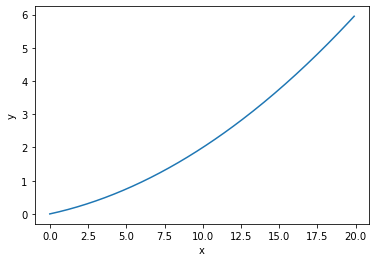

In [18]:
# draw graph
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y)
plt.show()

In [19]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


### draw graph

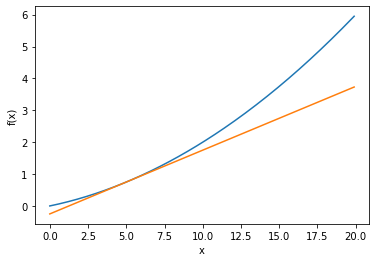

In [20]:
def target_line(f, x):
    d = numerical_diff(f, x)
    y = f(x) - d*x
    return lambda t: d*t + y

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = target_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
# derivative result graph
plt.plot(x, y2)
plt.show()

### 5-2 Partial differential

$$f(x_0, x_1) = x_0^2 + x_1^2

In [21]:
def function_2(x):
    return x[0]**2 + x[1]**2
    # or return np.sum(x**2)

#### 5-2-1 Example

1. when $ x_0 = 3, x_1 = 4 $, how value of $ \frac{\sigma f}{\sigma x_0} $ ?

In [22]:
def function_tmp1(x0):
    return x0*x0 + 4.0 ** 2.0

In [23]:
numerical_diff(function_tmp1, 3.0)

6.00000000000378

2. When $x_0 = 3, x_1 = 4$, how value of $ \frac{\sigma f}{\sigma x_1} $?

In [24]:
def function_tmp2(x1):
    return 3.0 ** 2.0 + x1 * x1
    

In [25]:
numerical_diff(function_tmp2, 4.0)

7.999999999999119

## 5-3 Gradient

A collection of partial differentials as a vector


In [27]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x) # Make a same list as x

    # debug
    print(grad)

    for idx in range(x.size):
        tmp_val = x[idx]

        # debug
        print(tmp_val)

        # calculate of f(x+h)
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # debug
        print(fxh1)

        # Calculate of f(x-h)
        x[idx] = tmp_val - h 
        fxh2 = f(x)

        # debug
        print(fxh2)

        grad[idx] = (fxh1-fxh2) / (2 * h)
        x[idx] = tmp_val # reset value

    return grad

In [28]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

[0. 0.]
3.0
25.00060001
24.99940001
4.0
25.00080001
24.99920001


array([6., 8.])

In [29]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

[0. 0.]
0.0
4.00000001
4.00000001
2.0
4.000400010000001
3.99960001


array([0., 4.])

In [30]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

[0. 0.]
3.0
9.000600010000001
8.999400009999999
0.0
9.00000001
9.00000001


array([6., 0.])

### 5-3-1 draw gradient graph

In [31]:
from mpl_toolkits.mplot3d import Axes3D

In [32]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val

        return grad

In [37]:
def _numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)

        return grad

In [34]:
def _function2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

In [35]:
def _tangent_line(f, x):
    d = _numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

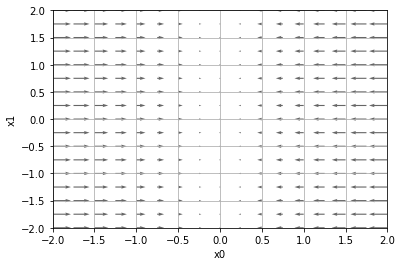

In [38]:
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)

    X, Y = np.meshgrid(x0, x1)

    X = X.flatten()
    Y = Y.flatten()

    grad = _numerical_gradient(_function2, np.array([X, Y]).T).T

    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1], angles="xy", color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.draw()
    plt.show()